In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
%matplotlib inline 

In [57]:
!pip3 install imblearn

In [4]:
df = pd.read_csv("genes_test.csv")
df2 = pd.read_csv("genes_train.csv")

In [23]:
df.head()

,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,GB DEF = Calcium/calmodulin-dependent protein kinase II delta E mRNA; partial cds,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypeptide 1,PTGER3 Prostaglandin E receptor 3 (subtype EP3) {alternative products}.2,HMG2 High-mobility group (nonhistone chromosomal) protein 2.1,RB1 Retinoblastoma 1 (including osteosarcoma).1,GB DEF = Glycophorin Sta (type A) exons 3 and 4; partial,GB DEF = mRNA (clone 1A7),patient,cancer type
0,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,46,104,15,245,164,84,100,-18,41,ALL
1,22,-153,17,276,-211,-250,55,-141,0,500,...,16,558,24,893,297,6,1971,-42,42,ALL
2,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,-84,615,-52,1235,9,7,1545,-81,43,ALL
3,-146,-74,170,174,-32,-318,8,-152,-148,17,...,-142,249,-220,354,-42,-100,45,-108,44,ALL
4,-187,-187,312,142,114,-148,-184,-133,12,97,...,-185,13,-148,304,-1,-207,112,-190,45,ALL


In [12]:
df2.shape

(40, 7131)

(array([21., 15.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([  36. ,  285.1,  534.2,  783.3, 1032.4, 1281.5, 1530.6, 1779.7,
        2028.8, 2277.9, 2527. ]),
 <BarContainer object of 10 artists>)

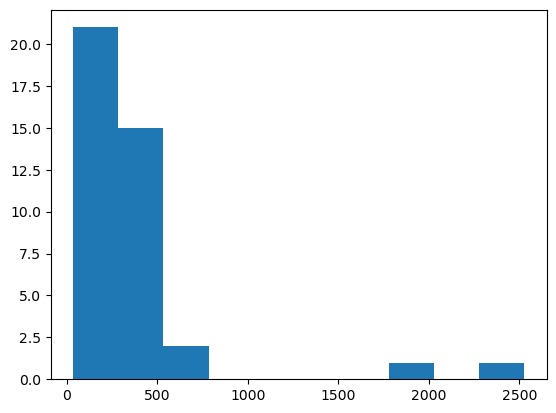

In [19]:
plt.hist(df2["TUBULIN ALPHA-4 CHAIN"])

In [ ]:
# The shape of the training data is (40,7131). This means that in the study, 40 paitents participated and they were able to collect 7,131 featuers from them. 
# Looking at a random feature from the data set, you can see that the data isn't really balanced. There is more data heavly skewed to the right, then from the left. 
# Also, the same thing is true for the cancer type histogram, therefore you can infer that the training data is a unbalanced. 

In [13]:
df2.head()

,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,GB DEF = Calcium/calmodulin-dependent protein kinase II delta E mRNA; partial cds,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypeptide 1,PTGER3 Prostaglandin E receptor 3 (subtype EP3) {alternative products}.2,HMG2 High-mobility group (nonhistone chromosomal) protein 2.1,RB1 Retinoblastoma 1 (including osteosarcoma).1,GB DEF = Glycophorin Sta (type A) exons 3 and 4; partial,GB DEF = mRNA (clone 1A7),patient,cancer type
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,-125,389,-37,793,329,36,191,-37,1,ALL
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,-36,442,-17,782,295,11,76,-14,2,ALL
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,33,168,52,1138,777,41,228,-41,3,ALL
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,218,174,-110,627,170,-50,126,-91,4,ALL
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,57,504,-26,250,314,14,56,-25,5,ALL


(array([29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

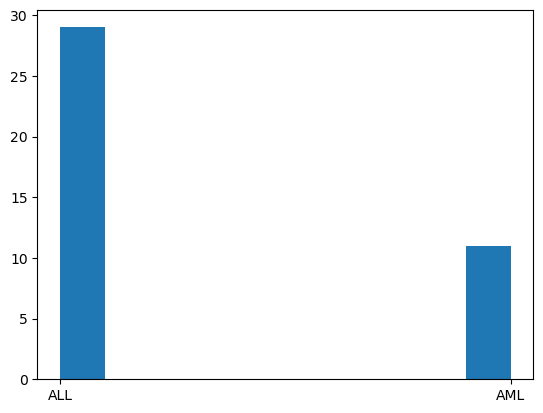

In [17]:
plt.hist(df2["cancer type"])

In [ ]:
# Looking at the histogram, you can see that 29 patients have ALL cancer type and 11 have AML cancer type. 
# This output data is unbalanced because there are significantly more patients with ALL cancer type than with AML cancer type. 
# Between the two types, it isn't as evenly distributed. 

In [20]:
df2.max(axis = 1)

C:\Users\court\AppData\Local\Temp\ipykernel_22984\2801104348.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.max(axis = 1)


0     31086
1     29288
2     28056
3     31449
4     29543
5     38467
6     41911
7     40065
8     23602
9     28033
10    25966
11    30546
12    30797
13    28519
14    30256
15    27268
16    28952
17    32645
18    33143
19    27358
20    33548
21    39558
22    36417
23    27983
24    32785
25    31614
26    31261
27    29833
28    30354
29    25055
30    28350
31    25093
32    32946
33    28698
34    61228
35    37164
36    32204
37    29169
38    45815
39    29136
dtype: int64

In [21]:
df2.min(axis = 1)

C:\Users\court\AppData\Local\Temp\ipykernel_22984\2869864257.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.min(axis = 1)


0    -19826
1    -17930
2    -27182
3    -23396
4    -10339
5    -21658
6    -24024
7    -27570
8    -25171
9    -12500
10   -17480
11   -15256
12   -12854
13   -14937
14   -13380
15   -10492
16   -19523
17    -8692
18   -11572
19   -13838
20    -7397
21   -17179
22   -14937
23   -17368
24   -17377
25   -10652
26   -20406
27   -20376
28    -9501
29   -17580
30   -25491
31   -28400
32   -27811
33   -17310
34   -16281
35   -27398
36   -23673
37   -23645
38   -21984
39   -21296
dtype: int64

In [22]:
df2.mean(axis = 1)

C:\Users\court\AppData\Local\Temp\ipykernel_22984\1851164202.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.mean(axis = 1)


0     641.277279
1     690.149790
2     698.210379
3     600.901543
4     679.438289
5     564.719355
6     584.356662
7     571.280084
8     789.604208
9     599.400421
10    632.166760
11    492.532819
12    674.563815
13    648.522581
14    705.682188
15    624.492847
16    791.292987
17    557.489902
18    558.555820
19    954.292006
20    577.572230
21    524.687798
22    532.180926
23    662.077279
24    597.783450
25    603.232398
26    501.277279
27    673.188920
28    556.389201
29    718.837868
30    598.569285
31    676.830435
32    723.466620
33    618.776578
34    514.429453
35    775.039832
36    689.156662
37    626.803366
38    582.118794
39    527.750912
dtype: float64

In [ ]:
# Looking at the maximum, minimum and mean for any given patient,  the data is significantly futher apart from eachother. 
# When looking at paitent one, the maxmium data for them is 29,288 while the minimum value is -27,182 and the mean is 690. 
# Looking at this particular data, this means that for a single patient the min, max and mean are very far apart from eachother. 
# Looking at another patient, you see the same thing as well, as the minimum and maximum are significantly different from the mean. 

# Therefore, I beleive that we will need to scale the data in order, for the values to be more in range of eachother. 

In [27]:
x_test = df.drop(["cancer type", "patient"], axis = 1)
y_test = df["cancer type"]

x_train = df2.drop(["cancer type", "patient"], axis = 1)
y_train = df2["cancer type"]

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test) 

In [31]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

ypred = model.predict(x_test_scaled)

In [34]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,ypred)

print(model.score(x_train_scaled, y_train))
print("Accuracy: ", metrics.accuracy_score(y_test, ypred))
print(cm)

1.0
Accuracy:  0.75
[[18  0]
 [ 8  6]]


In [ ]:
# The score of the model training data is 1 
# The accuracy of the training data is .75 
# The confusion matrix has the 24 correctly classified values and only 8 misclassified values 

In [35]:
from sklearn.naive_bayes import GaussianNB 

model2 = GaussianNB()
model2.fit(x_train_scaled, y_train)

ypred2 = model2.predict(x_test_scaled)

In [37]:
cm2 = metrics.confusion_matrix(y_test,ypred2)

print(model2.score(x_train_scaled, y_train))
print("Accuracy: ", metrics.accuracy_score(y_test, ypred2))
print(cm2)

1.0
Accuracy:  0.78125
[[18  0]
 [ 7  7]]


In [ ]:
# The score of the model training data is one. 
# The accuracy of the model went up as it is now .78125. 
# The confusion matrix improved as there are now 25 correctly classified values and only 7 misclassified values. 

In [ ]:
# The scores are low because we fit transformed the testing and the training data. When we use fit transform a set of data you calculate the mean and varaince of each of the features
# present in the data. The transform method is used in all of the features however, if the data isn't normally distributed; using fit transform can have
# produce a low accuracy value, which is what happened above. Using pandas might be a better method because we are only using the x training mean and std. instead of for x_test using x test mean
# and standard deviation. 
# The confusion matrix has a type I error which means that there are false positives in the data set. 
# This is important because a false positive means that the observation was predicted to be positive however it was actually negative. 

In [41]:
x2_train_scaled = (x_train - x_train.mean())/x_train.std()

In [42]:
x2_test_scaled = (x_test - x_train.mean())/ x_train.std()

In [44]:
model3 = LogisticRegression()
model3.fit(x2_train_scaled, y_train)

ypred3 = model3.predict(x2_test_scaled)

cm3 = metrics.confusion_matrix(y_test,ypred3)

print(model3.score(x2_train_scaled, y_train))
print("Accuracy: ", metrics.accuracy_score(y_test, ypred3))
print(cm3)

1.0
Accuracy:  0.8125
[[18  0]
 [ 6  8]]


In [46]:
model4 = GaussianNB()
model4.fit(x2_train_scaled, y_train)

ypred4 = model4.predict(x2_test_scaled)
cm4 = metrics.confusion_matrix(y_test,ypred4)

print(model3.score(x2_train_scaled, y_train))
print("Accuracy: ", metrics.accuracy_score(y_test, ypred4))
print(cm3)

1.0
Accuracy:  0.90625
[[18  0]
 [ 6  8]]


In [ ]:
# Retraining the logisitic regression and Naive Bayes model to the new scaled data, there is a slight improvement with the performance. 
# The model score number has stayed the same in both cases with a value of one; however, there was an improvement with the accuracy score. 
# Looking at the accuracy score given by the hand scaled data, there is improvement as the value increased from .78 to .81 and the accuracy change increased in the gaussian 
#NB from being .91. 
# The confusion matrix, also improved, and now there are 26 correctly classified values and only 6 misclassified values. 

In [48]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 30).fit(x2_train_scaled)
print(pca.n_components_)
print(pca.explained_variance_ratio_.cumsum())

30
[0.14160178 0.25887229 0.32470765 0.37114269 0.41593652 0.45377108
 0.49028899 0.52256446 0.55262452 0.57871474 0.60331123 0.62601503
 0.64798886 0.66892235 0.68894065 0.70786795 0.72580368 0.74303738
 0.75991715 0.77579443 0.79135625 0.80636007 0.82059574 0.83464022
 0.84827473 0.86159723 0.87466785 0.88744908 0.89998391 0.91215863]


In [50]:
pca = PCA(n_components = 40).fit(x2_train_scaled)
print(pca.n_components_)
print(pca.explained_variance_ratio_.cumsum())

40
[0.14160178 0.25887229 0.32470765 0.37114269 0.41593652 0.45377108
 0.49028899 0.52256446 0.55262452 0.57871474 0.60331123 0.62601503
 0.64798886 0.66892235 0.68894065 0.70786795 0.72580368 0.74303738
 0.75991715 0.77579443 0.79135625 0.80636007 0.82059574 0.83464022
 0.84827473 0.86159723 0.87466785 0.88744908 0.89998391 0.91215863
 0.92427847 0.93560532 0.94637448 0.9567996  0.9663936  0.97566035
 0.9842495  0.99229838 1.         1.        ]


In [53]:
pca = PCA(n_components = 20).fit(x2_train_scaled)
print(pca.n_components_)
print(pca.explained_variance_ratio_.cumsum())

20
[0.14160178 0.25887229 0.32470765 0.37114258 0.41593629 0.45377037
 0.49028725 0.52256218 0.55262122 0.57869389 0.60328289 0.62596606
 0.64791847 0.66881441 0.68872036 0.70761081 0.72546886 0.74256264
 0.75922356 0.77498448]


In [ ]:
# As you increase the number of n_components, the cumsum() value increases the number of values it displays. 
# The values don't change, however you are giving more information as there is an increase in values that are displayed 
# You would need 30 components to get a 90% variance. 

In [54]:
pca = PCA(n_components = 30).fit(x2_train_scaled)
x_train_scaled_pca = pca.transform(x2_train_scaled) 
x_test_scaled_pca = pca.transform(x2_test_scaled)

In [56]:
model5 = LogisticRegression()
model5.fit(x_train_scaled_pca, y_train)

ypred5 = model5.predict(x_test_scaled_pca)

cm5 = metrics.confusion_matrix(y_test,ypred5)

print(model5.score(x_train_scaled_pca, y_train))
print("Accuracy: ", metrics.accuracy_score(y_test, ypred5))
print(cm5)

1.0
Accuracy:  0.78125
[[18  0]
 [ 7  7]]


In [55]:
model6 = GaussianNB()
model6.fit(x_train_scaled_pca, y_train)

ypred6 = model6.predict(x_test_scaled_pca)
cm6 = metrics.confusion_matrix(y_test,ypred6)

print(model6.score(x_train_scaled_pca, y_train))
print("Accuracy: ", metrics.accuracy_score(y_test, ypred6))
print(cm6)

0.975
Accuracy:  0.6875
[[18  0]
 [10  4]]


In [ ]:
# From model one, the classification matricies and accuracies went down. This could mean that using PCA isn't appropriate for this set of data. 

In [ ]:
# I don't think PCA is appropriate here because, looking at the accuracy score and confidential matrix, we saw a decrease in performance
# for both linear regression and gaussian nb. In linear regression, the accuracy score went back down to .78 and there are now only 25 correctly idenitfied values with 7 misclassified values. 
# When looking at Gaussian NB, there is also no improvement as the model score went down to .975, the accuracy score went futher down to .6875 and the were only 22 correctly 
# classified values. 

In [58]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

x_bal, y_bal = sm.fit_resample(x2_train_scaled,y_train)
x2_bal, y2_bal = sm.fit_resample(x2_test_scaled, y_test)

C:\Users\court\Downloads\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cancer type', ylabel='count'>

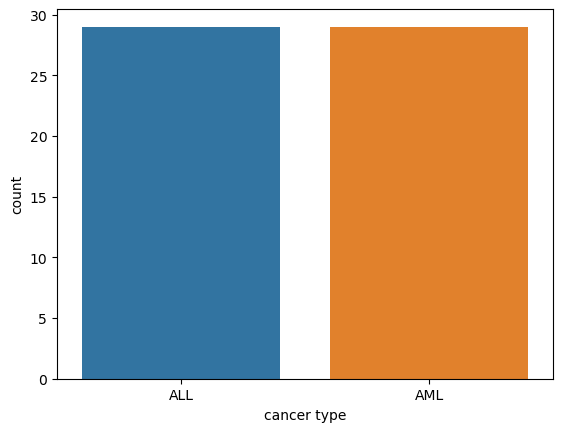

In [60]:
sns.countplot(y_bal)
# For y train data 

C:\Users\court\Downloads\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cancer type', ylabel='count'>

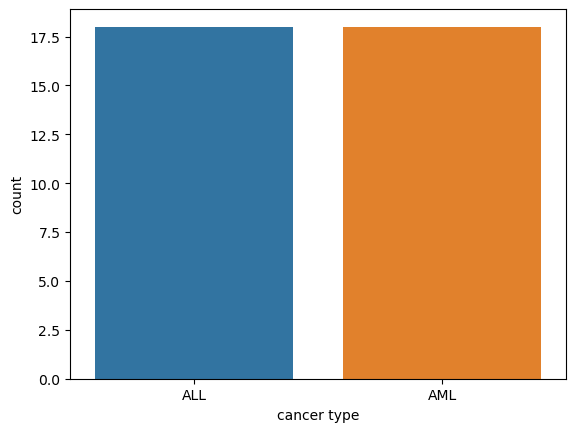

In [59]:
sns.countplot(y2_bal)
# For y train data 

In [ ]:
# The distribution of the outputs in the new y array are equal. This means that the cancer types are both set to a value of 17.5 
# However realisticly, it isn't an accurate output because a patient can't be classified as only being half of one cancer type 

In [64]:
model8 = LogisticRegression()
model8.fit(x_bal, y_bal)

ypred8 = model8.predict(x2_bal)

cm8 = metrics.confusion_matrix(y2_bal,ypred8)

print(model8.score(x_bal, y_bal))
print("Accuracy: ", metrics.accuracy_score(y2_bal, ypred8))
print(cm8)

1.0
Accuracy:  0.8611111111111112
[[18  0]
 [ 5 13]]


In [62]:
model7 = GaussianNB()
model7.fit(x_bal, y_bal)

ypred7 = model7.predict(x2_bal)
cm7 = metrics.confusion_matrix(y2_bal,ypred7)

print(model7.score(x_bal, y_bal))
print("Accuracy: ", metrics.accuracy_score(y2_bal, ypred7))
print(cm7)

1.0
Accuracy:  0.8888888888888888
[[16  2]
 [ 2 16]]


In [ ]:
# Looking at the new model compared to the model conducted in Part 1. There was an improvement from the past
# PCA analaysis, with an increase in the accuracy for Logisitic Regression and Gaussian. However, looking at the new balanced data
# compared to the very first regression made in part one. 
# In part one, there was an accuracy level of .75, with only 24 correctly classified values. There was 8 misclassifications. 
# However with the new balanced y equations, there was an increase in the accuracy for both logisitc regression and gaussian NB
# The y_balanced gaussian NB had an increase in accuarcy with a new value of .88, with an increase in correctly classified values with 32 correctly classified values and only 4 misclassified features. 
# Also with the logistic regression there was an improvement with the accuracy and cm matrix as well.
# With the logistic regressoin there was an increase in the accuracy score, with a value of .861. The confidence matrix was also improved with 31 correctly 
# classified values and only 5 misclassified values. 

In [ ]:
# Summary

# If I was trying to use this data and build a model for new patients the first thing I would do wold be scaling the data. 
# Scaling the data is important in this case, because the data is unbalanced. When the data is unbalanced, and you try to perform models 
# and create predictions. Having unbalanced data is bad because the data then becomes harder to gain any information and to make any predictions because it is harder to 
# see the minority data. Another reason it would be important to scale the data is because it provides a higher accuracy model and will provide a higher detection rate. 
# To scale the data, one scaler technique I might use, that was beneficial in this lab was to use the pandas scaler to first scale the data. The reason why I am using this 
# scaler is because it had the highest accuracy and cm results for both logistic regression and Gaussian NB. I wouldn't use PCA because it wasn't beneficial in improving the accuaracy
# score, but if I didn't use pandas standard scaler, I would use the SMOTE scaler, however in a realsitsic setting, if the y vlaue is an odd number, the SMOTE could provide some inplaussible results like including decimals. 
# Lastly, when choosing between Gaussian NB and Logisitic Regression, I would use Gaussian NB because it provided a greater accuracy value when tested. 